<a href="https://colab.research.google.com/github/juanchi1789/PIB/blob/colab/Compression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math
import scipy
from sys import getsizeof

(-0.5, 927.5, 927.5, -0.5)

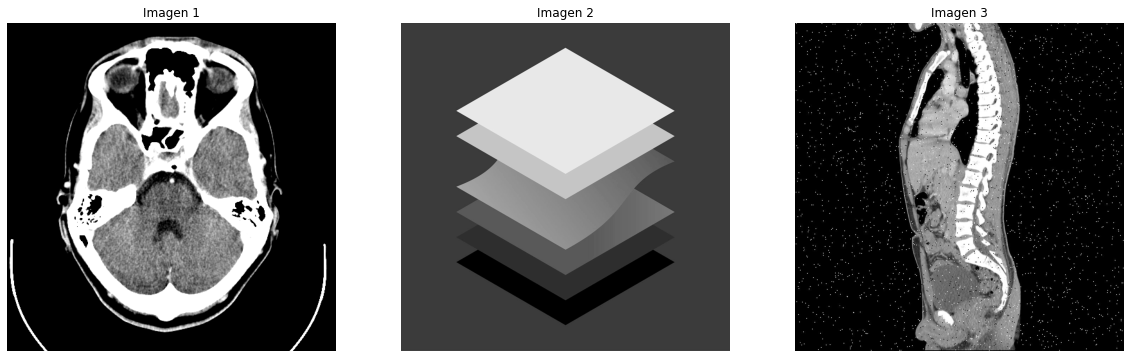

In [79]:
image1 = cv2.imread('/content/Img2.png',0)    #  Cerebro
image2 = cv2.imread('/content/img12.png',0)   #  Cuadrados
image3 = cv2.imread('/content/img8.jpg',0)    #  Con Ruido SyP


fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,20))

ax1.imshow(image1,cmap='gray')
ax1.set_title('Imagen 1')
ax1.axis('off')

ax2.imshow(image2,cmap='gray')
ax2.set_title('Imagen 2')
ax2.axis('off')

ax3.imshow(image3,cmap='gray')
ax3.set_title('Imagen 3')
ax3.axis('off')

# Algoritmo de Huffman

In [ ]:
def findCode(tree, val):
    code, padre = tree[val]
    if padre != 'r':
        code = findCode(tree, padre) + code
    return code
    
def sortFirst(val):
  return val[0]

In [ ]:
# COMPRESION

def HuffmanCompresion(imagen,flag=False):
  if flag: # Para Jpeg 
    lista = imagen
    dtype = lista[0].dtype
    imagen = np.zeros(len(lista),dtype=dtype)
    for i in range(len(lista)):
      imagen[i] = lista[i]
    imagen = imagen.reshape((1,len(lista)))

  filas,columnas = imagen.shape
  N = filas*columnas
  dtype = imagen.dtype

  minimo = np.min(imagen)
  maximo = np.max(imagen)
  R = maximo - minimo + 1
  R = R.astype(int)

  num = np.max(imagen)
  a = math.ceil(math.log(num,2))
  nbins = 2**a
  if flag:
    nbins = R
  
  hist = np.histogram(imagen,bins=nbins)
  h = hist[0] 
  histograma = h/N

  Lista_histograma = [] #lista
  Lista_intensidad = [] #valores

  for i in range(nbins):
    if histograma[i]!=0:
      Lista_histograma.append([histograma[i],minimo+i])
      Lista_intensidad.append(minimo+i)
  
  k = 0
  tree = {}
  while len(Lista_histograma)>1:
    Lista_histograma.sort(key = sortFirst, reverse=True) # ordeno de menor a mayor
    a1 = Lista_histograma.pop()
    a2 = Lista_histograma.pop()
    k = k + 1
    kstr = str(k)
    nstr = 'n'+ kstr
    n = [a1[0]+a2[0],nstr] 
    Lista_histograma.append(n)
    tree[a1[1]] = ['0',nstr]
    tree[a2[1]] = ['1',nstr]
  
  tree[nstr] = ['','r']

  dicc= {} #codigo para interpretar tree
  for a in Lista_intensidad:
    code = findCode(tree,a)
    dicc[a] = code

  string_out = ''
  for i in range(filas):
    for j in range(columnas):
      pixel = imagen[i,j]
      pixelcode = dicc[pixel]
      string_out = string_out + pixelcode
  dicc_out = dict([(value, key) for key, value in dicc.items()])
  dicc_out['size'] = [filas,columnas]
  dicc_out['dtype'] = dtype

  return string_out, N, dicc_out


#DESCOMPRESION

def HuffmanDescompresion(comprimida,N,dicc):
  filas,columnas = dicc['size']
  dtype = dicc['dtype']
  imagen_out = np.zeros(filas*columnas,dtype=dtype)
    
  pix = 0
  code = ''
  
  for k in range(len(comprimida)):
    code += comprimida[k]
    if code in dicc.keys():
      imagen_out[pix] = dicc[code]
      pix += 1
      code = ''
  imagen_out = imagen_out.reshape((filas,columnas))
  return imagen_out


# Algoritmo de RL

## Horizontal y vertical

In [ ]:
def ComprimirLRE_HV(img, modo):
    # modos: 0 horizontal, 1 vertical

    # Horizontal
    if modo == 0:
        modo = "Horizontal"
        fil, col = img.shape
        dtype = img.dtype
        listaRLE = [[fil, col, modo, dtype], []]

        value = img[0, 0]
        cant = 0

        for i in range(col):
            for j in range(fil):
                gris = img[i, j]
                if gris == value:
                    cant += 1
                else:
                    listaRLE[1].append([value, cant])
                    value = gris
                    cant = 1
        listaRLE[1].append([value, cant])



    # Vertical
    if modo == 1:
        modo = "Vertical"
        fil, col = img.shape
        dtype = img.dtype
        listaRLE = [[fil, col, modo, dtype], []]

        value = img[0, 0]
        cant = 0

        for i in range(col):
            for j in range(fil):
                gris = img[i, j]
                if gris == value:
                    cant += 1
                else:

                    listaRLE[1].append([value, cant])

                    value = gris
                    cant = 1

        listaRLE[1].append([value, cant])

    return listaRLE
  
def decoder_rle(lista):
  list_decoded = []
  for i in range(len(lista)):
      value = lista[i][0]
      times = lista[i][1]
      k = 0
      while k < times:
          list_decoded.append(value)
          k += 1
  return list_decoded


## Diagonal

In [72]:
def comprimirRLE_ZZ(img):  # No lo estoy usando

    modo = "Zig-Zag"
    fil, col = img.shape
    dtype = img.dtype
    listaRLE = [[fil, col, modo, dtype], []]

    return listaRLE


def zig_zag_list(matrix):
    fil, col = matrix.shape
    solution = [[] for i in range(fil + col - 1)]

    for i in range(fil):
        for j in range(col):
            sum = i + j
            if (sum % 2 == 0):

                # add at beginning
                solution[sum].insert(0, matrix[i][j])
            else:
                # add at end of the list
                solution[sum].append(matrix[i][j])

    return solution


def encoder_rle(lista):
    i = 0
    contador = 1
    lista_out = []
    while i < len(lista):
        value = lista[i]

        if i == len(lista) - 1 and contador == 1:
            lista_out.append([lista[i], contador])
            break

        if i == len(lista) - 1 and contador > 1:
            lista_out.append([lista[i], contador])
            break

        if value == lista[i + 1] and i < len(lista):
            contador += 1

        if value != lista[i + 1] or i == len(lista):
            lista_out.append([lista[i], contador])
            contador = 1

        i += 1

    return lista_out


def decoder_rle(lista):
    list_decoded = []
    for i in range(len(lista)):
        value = lista[i][0]
        times = lista[i][1]
        k = 0
        while k < times:
            list_decoded.append(value)
            k += 1
    return list_decoded


def RLE_encoder(matrix):
    solution = zig_zag_list(matrix)  # Esta es la lista de listas, de las diagonales
    # Desde aca opero sobre la solucion
    fil, col = matrix.shape
    modo = "Zig-Zag"
    dtype = type(matrix)
    lista_salida = [[fil, col, modo, dtype], []]

    for i in range(len(solution)):
        lista_salida[1].append(encoder_rle(solution[i]))

    return lista_salida

In [ ]:
def RLECompresion(imagen,modo):
  #modos: horizontal, vertical, diagonal
  
  filas,columnas = imagen.shape
  dtype = imagen.dtype
  lista_out = [filas,columnas,modo,dtype]

  lista_out = compresionDiagonal(imagen)

  return lista_out


# DIAGONAL!
def compresionDiagonal(imagen):
  nfil,ncol = imagen.shape
  dtype = imagen.dtype
  N = nfil*ncol
  maxfil = nfil-1
  maxcol = ncol-1
  npix = 0
  lastfil, lastcol = 1, -1
  currentfil, currentcol = 0, 0
  lista = [nfil,ncol,'diagonal',dtype]
  targetval= imagen[0,0]
  contador = 0
  while npix<N:
    currentval = imagen[currentfil,currentcol]
    if currentval==targetval:
      contador += 1
    else:
      lista.append(targetval)
      lista.append(contador)
      targetval = currentval
      contador = 1
    if currentfil==0: #en la fila de arriba
      if currentfil!=lastfil: #llega en diagonal
        if currentcol!=maxcol: #no es la ultima col
          lastfil = currentfil
          lastcol = currentcol
          currentcol += 1
        else:  #es la ultima col
          lastcol = currentcol
          lastfil = currentfil
          currentfil += 1
      else: #llega de costado
        lastcol = currentcol
        lastfil = currentfil
        currentfil += 1
        currentcol -= 1
    elif currentfil==maxfil: #en la fila de abajo
      if currentfil!= lastfil and currentcol!=lastcol: #llega en diagonal
        lastfil = currentfil
        lastcol = currentcol
        currentcol += 1
      elif (currentfil!= lastfil and currentcol==lastcol) or (currentfil==lastfil and currentcol!=lastcol): #llega de arriba o de costado
        lastfil = currentfil
        lastcol = currentcol
        currentfil -= 1
        currentcol += 1
    else: #filas del medio
      if currentcol==0: #primera columna
        if currentcol == lastcol: #viene de arriba
          lastfil = currentfil
          lastcol = currentcol
          currentfil -= 1
          currentcol += 1
        else: #viene en diagonal
          lastcol = currentcol
          lastfil = currentfil
          currentfil+=1
      elif currentcol==maxcol: #ultima columna
        if currentcol==lastcol: #viene de arriba
          lastfil = currentfil
          lastcol = currentcol
          currentfil += 1
          currentcol -= 1
        else: #viene en diagonal
          lastcol = currentcol
          lastfil = currentfil
          currentfil += 1
      else:
        if lastfil<currentfil: #viene bajando
          lastfil = currentfil
          lastcol = currentcol
          currentfil += 1
          currentcol -= 1
        else: #viene subiendo
          lastfil = currentfil
          lastcol = currentcol
          currentfil -= 1
          currentcol += 1
    npix += 1
  lista.append(targetval)
  lista.append(contador)

  return lista



# DESCOMPRESION

def RLEDescompresion(lista):
  filas,columnas,modo,dtype = lista[0], lista[1], lista[2], lista[3]
  l = len(lista)
  if modo=='diagonal':
    imagen_out = descompresionDiagonal(lista[4:],[filas,columnas],dtype)

  return imagen_out


# DIAGONAL!
def descompresionDiagonal(lista,size,dtype):
  fil,col = size
  imagen_out = np.zeros((fil,col),dtype=dtype)
  largo = len(lista)
  numerodepixeles = 0
  fil_ultima, col_ultima = 1, -1
  fil_actual, col_actual = 0, 0
  for k in range(0,largo,2):
    valor = lista[k]
    repeticiones = lista[k+1]
    N = numerodepixeles + repeticiones
    while numerodepixeles < N:
      imagen_out[fil_actual,col_actual] = valor
      if fil_actual == 0:            # en la fila de arriba
        if fil_actual != fil_ultima: # llega en diagonal
          if col_actual != col - 1:  # no es la ultima col
            fil_ultima = fil_actual
            col_ultima = col_actual
            col_actual = col_actual + 1
          else:                      # es la ultima col
            col_ultima = col_actual
            fil_ultima = fil_actual
            fil_actual = fil_actual + 1
        else:                        # llega de costado
          col_ultima = col_actual
          fil_ultima = fil_actual
          fil_actual = fil_actual + 1
          col_actual = col_actual - 1
      elif fil_actual == fil - 1:    # en la fila de abajo
        if fil_actual != fil_ultima and col_actual != col_ultima: # llega en diagonal
          fil_ultima = fil_actual
          col_ultima = col_actual
          col_actual = col_actual + 1
        elif (fil_actual != fil_ultima and col_actual == col_ultima) or (fil_actual == fil_ultima and col_actual != col_ultima): #llega de arriba o de costado
          fil_ultima = fil_actual
          col_ultima = col_actual
          fil_actual = fil_actual - 1
          col_actual = col_actual + 1
      else:                           # filas del medio
        if col_actual == 0:           # primera columna
          if col_actual == col_ultima:# viene de arriba
            fil_ultima = fil_actual
            col_ultima = col_actual
            fil_actual = fil_actual - 1
            col_actual = col_actual + 1
          else:                       # viene en diagonal
            col_ultima = col_actual
            fil_ultima = fil_actual
            fil_actual = fil_actual + 1
        elif col_actual == col - 1:    # ultima columna
          if col_actual == col_ultima: # viene de arriba
            fil_ultima = fil_actual
            col_ultima = col_actual
            fil_actual = fil_actual + 1
            col_actual = col_actual - 1
          else:                        # viene en diagonal
            col_ultima = col_actual
            fil_ultima = fil_actual
            fil_actual = fil_actual + 1
        else:
          if fil_ultima<fil_actual:    # viene bajando
            fil_ultima = fil_actual
            col_ultima = col_actual
            fil_actual = fil_actual + 1
            col_actual = col_actual - 1
          else:                        # viene subiendo
            fil_ultima = fil_actual
            col_ultima = col_actual
            fil_actual = fil_actual - 1
            col_actual = col_actual + 1
      numerodepixeles = numerodepixeles + 1

  return imagen_out





# JPEG

In [ ]:
# CODIGOS NECESARIOS PRE COMPRESION 

def AjustarImagen(imagen): # Para que en la imagen me entren imágenes de 8x8 sin bordes
  m = 8 # Divido en porciones de 8x8
  fil, col = imagen.shape
  restodefil = fil % m
  restodecol = col % m

  if restodefil == 0 and restodecol == 0:
    #print('Imagen más chica que 8x8 píxeles')
    return imagen

  elif restodefil==0: #Filas más chicas que 8 píxeles
    col_add = m-restodecol
    colcopy = imagen[:,col-1].copy().reshape((fil,1))
    for j in range(coladd):
      imagen = np.concatenate((imagen,colcopy),axis=1)

  elif restodecol==0: #Columnas más chicas que 8 píxeles
    fil_add = m-restodefil
    filcopy = imagen[fil-1,:].copy().reshape((1,col))
    for i in range(filadd):
      imagen = np.concatenate((imagen,filcopy))

  else:
    fil_add = m-restodefil
    col_add = m-restodecol
    filcopy = imagen[fil-1,:].copy().reshape((1,col))
    for i in range(fil_add):
      imagen = np.concatenate((imagen,filcopy))
    colcopy = imagen[:,col-1].copy().reshape((fil+fil_add,1))
    for j in range(col_add):
      imagen = np.concatenate((imagen,colcopy),axis=1)

  return imagen


def RLEDescompresionJpeg(lista,dtype):
  fil,col = 8, 8
  imagen_out = np.zeros((fil,col),dtype=dtype)
  numerodepixeles = 0
  fil_ultima, col_ultima = 1, -1
  fil_actual, col_actual = 0, 0

  while fil_ultima != fil - 1 or col_ultima != col - 1:
    valor = lista.pop(0)
    repeticiones = lista.pop(0)
    N = numerodepixeles + repeticiones
    while numerodepixeles < N:
      imagen_out[fil_actual,col_actual] = valor
      if fil_actual == 0: #en la fila de arriba
        if fil_actual != fil_ultima: #llega en diagonal
          if col_actual != col-1: #no es la ultima col
            fil_ultima = fil_actual
            col_ultima = col_actual
            col_actual = col_actual + 1
          else:  #es la ultima col
            col_ultima = col_actual
            fil_ultima = fil_actual
            fil_actual = fil_actual + 1
        else: #llega de costado
          col_ultima = col_actual
          fil_ultima = fil_actual
          fil_actual = fil_actual + 1
          col_actual = col_actual - 1
      elif fil_actual == fil-1: #en la fila de abajo
        if fil_actual != fil_ultima and col_actual != col_ultima: #llega en diagonal
          fil_ultima = fil_actual
          col_ultima = col_actual
          col_actual = col_actual + 1
        elif (fil_actual != fil_ultima and col_actual == col_ultima) or (fil_actual == fil_ultima and col_actual != col_ultima): #llega de arriba o de costado
          fil_ultima = fil_actual
          col_ultima = col_actual
          fil_actual = fil_actual - 1
          col_actual = col_actual + 1
      else: #filas del medio
        if col_actual == 0: #primera columna
          if col_actual == col_ultima: #viene de arriba
            fil_ultima = fil_actual
            col_ultima = col_actual
            fil_actual = fil_actual - 1
            col_actual = col_actual + 1
          else: #viene en diagonal
            col_ultima = col_actual
            fil_ultima = fil_actual
            fil_actual = fil_actual + 1
        elif col_actual == col-1: #ultima columna
          if col_actual == col_ultima: #viene de arriba
            fil_ultima = fil_actual
            col_ultima = col_actual
            fil_actual = fil_actual + 1
            col_actual = col_actual - 1
          else: #viene en diagonal
            col_ultima = col_actual
            fil_ultima = fil_actual
            fil_actual = fil_actual + 1
        else:
          if fil_ultima < fil_actual: #viene bajando
            fil_ultima = fil_actual
            col_ultima = col_actual
            fil_actual = fil_actual + 1
            col_actual = col_actual - 1
          else: #viene subiendo
            fil_ultima = fil_actual
            col_ultima = col_actual
            fil_actual = fil_actual - 1
            col_actual = col_actual + 1
      numerodepixeles = numerodepixeles + 1
  return imagen_out, lista

def escalar(imagen,limites,maxint):
  fil,col = imagen.shape
  imin, imax = limites[0], limites[1]
  imagen_out = np.zeros((fil,col),dtype=imagen.dtype)
  for i in range(fil):
    for j in range(col):
      pixint = imagen[i,j]
      if pixint >= imin and pixint <= imax:
        imagen_out[i,j] = maxint*(pixint-imin)/(imax-imin)     
  return imagen_out


# COMPRESION

def JpegCompresion(imagen):
  fil0, col0 = imagen.shape
  dtype = imagen.dtype
  imagenaux = AjustarImagen(imagen) # Quiero que me entren n-veces los cuadrados de 8x8
  fil, col = imagenaux.shape
  imagenRLE = []
  medias = []
  cuantization = np.zeros((8,8))
  mask = np.arange(30)


  k = 1
  for i in range(8):
    cuantization[i,:] = mask[k:k+16:2]
    k = k + 2
  

  for i in range(0,fil,8):
    for j in range(0,col,8):
      mosaico = imagenaux[i:i+8,j:j+8]
      media = np.mean(mosaico)
      medias.append(media)
      mosaico = mosaico - media # centrado
      #mosaicoTDC = TDC2(mosaico)  
      mosaicoTDC = scipy.fft.dct(mosaico)
      mosaicoCUANT = mosaicoTDC//cuantization
      mosaicoCUANT = mosaicoCUANT.astype(int)
      mosaicoRLE = RLECompresion(mosaicoCUANT,'diagonal')
      mosaicoRLE = mosaicoRLE[4:]
      imagenRLE = imagenRLE + mosaicoRLE
  
  medias.append(dtype)
  imagenhuffman, N,  diccionariohuffman = HuffmanCompresion(imagenRLE, flag = True)

  return imagenhuffman, diccionariohuffman, medias, [fil,col,fil0,col0],imagenRLE


# DESCOMPRESION

def JpegDescompresion(imagen_huff,dicc_huff,medias,shape):
  N = shape[0]
  #Descomprimo Huffman y paso a lista
  vector = HuffmanDescompresion(imagen_huff,N,dicc_huff)
  lista_RLE = []
  for k in range(vector.size):
    lista_RLE.append(vector[0][k])
  
  #Para cada mosaico: descomprimo RLE, multiplico por Matriz de Cuantizacion, antitransformo TDC, sumo la media
  dtype = medias.pop()
  fil,col,fil0,col0 = shape
  imagen_out = np.zeros((fil,col))
  cuantization = np.zeros((8,8))
  mask = np.arange(30)
  k = 1
  for i in range(8):
    cuantization[i,:] = mask[k:k+16:2]
    k = k +2
  m = 0
  for i in range(0,fil,8):
    for j in range(0,col,8):
      mosaico, lista_RLE = RLEDescompresionJpeg(lista_RLE, int)
      mosaico = mosaico*cuantization
      #mosaico = ITDC2(mosaico)
      mosaico = scipy.fft.idct(mosaico)
      mosaico = mosaico + medias[m]
      m = m + 1
      imagen_out[i:i+8,j:j+8] = mosaico
      
  imagen_out = imagen_out[:fil0,:col0]
  lims = [np.min(imagen_out),np.max(imagen_out)]
  if dtype == np.uint8:
    imax = 255
  elif dtype == np.uint16:
    imax = 2**16-1
  else:
    imax = 2**16-1
    print('ERROR: imax=2**16-1')
  imagen_out = escalar(imagen_out,lims,imax)    
  imagen_out = imagen_out.astype(dtype)

  return imagen_out

# Compresion de las imagenes

In [ ]:
image1 = cv2.imread('/content/Img2.png',0) # Cerebro
image2 = cv2.imread('/content/img12.png',0)   # Cuadrados
image3 = cv2.imread('/content/img8.jpg',0)    # Con Ruido SyP

## Con Huffman

(-0.5, 511.5, 511.5, -0.5)

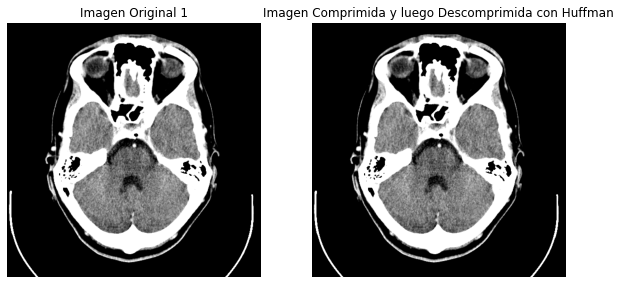

In [ ]:
im1_comprimida_Huffman = HuffmanCompresion(image1) #aca tengo en cada posicion, imagen, N y diccionario

im1_descomprimida_Huffman = HuffmanDescompresion(im1_comprimida_Huffman[0],im1_comprimida_Huffman[1],im1_comprimida_Huffman[2])

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,10))
ax1.imshow(image1,cmap='gray')
ax1.set_title('Imagen Original 1')
ax1.axis('off')
ax2.imshow(im1_descomprimida_Huffman,cmap='gray')
ax2.set_title('Imagen Comprimida y luego Descomprimida con Huffman')
ax2.axis('off')


## Con RLE

### Horizontal y vertical



La codificacion nos queda: [[95, 1200], [50, 1200], [61, 1200], [59, 1200], [56, 1200], [59, 100193], [64, 1], [61, 1], [56, 2], [59, 1], [61, 1], [59, 1], [61, 1], [59, 4], [61, 2], [59, 1185], [56, 2], [53, 1], [56, 1], [61, 2], [56, 1], [59, 1], [56, 1], [53, 2], [56, 1], [61, 1], [59, 1], [56, 2], [59, 1184], [61, 1], [56, 1], [59, 1], [61, 1], [56, 2], [59, 1], [56, 1], [59, 1], [61, 1], [59, 1], [56, 1], [53, 2], [56, 1], [61, 1], [59, 1184], [61, 1], [56, 1], [53, 1], [56, 1], [61, 2], [59, 1], [56, 1], [53, 1], [61, 1], [59, 1], [56, 1], [61, 1], [59, 1], [53, 1], [56, 1], [59, 1184], [56, 2], [61, 2], [56, 2], [61, 1], [59, 1], [61, 1], [59, 1], [56, 3], [59, 1], [61, 1], [56, 1], [59, 1184], [56, 1], [61, 3], [64, 1], [59, 1], [46, 1], [39, 2], [46, 1], [56, 1], [61, 2], [56, 2], [61, 1], [59, 1184], [56, 1], [61, 1], [59, 1], [56, 1], [46, 1], [34, 1], [78, 1], [169, 1], [149, 1], [61, 1], [28, 1], [56, 1], [61, 1], [53, 1], [61, 1], [59, 1187], [53, 1], [34, 1], [46, 1], 

(-0.5, 1199.5, 1199.5, -0.5)

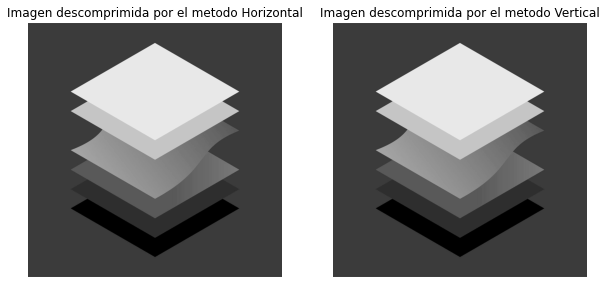

In [70]:
imagen = image2

# Horizontal #
codificada = ComprimirLRE_HV(imagen, 0)[1] # Imagen comprimida Horizontal
fil = ComprimirLRE_HV(imagen, 1)[0][0]
col = ComprimirLRE_HV(imagen, 1)[0][1]
deco = np.array(decoder_rle(codificada)) # Imagen decodificada Horizontal
matrix_final_H = deco.reshape(fil,col) # Resultado final de la decodificacion

# Vertical #
codificada = ComprimirLRE_HV(imagen, 1)[1] # Imagen comprimida Horizontal
fil = ComprimirLRE_HV(imagen, 1)[0][0]
col = ComprimirLRE_HV(imagen, 1)[0][1]
deco = np.array(decoder_rle(codificada)) # Imagen decodificada Horizontal
matrix_final_V = deco.reshape(fil,col) # Resultado final de la decodificacion

print("\n")
print("La codificacion nos queda:",codificada)
print("\n")

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,10))

ax1.imshow(matrix_final_H,cmap='gray')
ax1.set_title('Imagen descomprimida por el metodo Horizontal')
ax1.axis('off')

ax2.imshow(matrix_final_V,cmap='gray')
ax2.set_title('Imagen descomprimida por el metodo Vertical')
ax2.axis('off')

### Diagonal

La codificacion nos queda: [1200, 1200, 'diagonal', dtype('uint8'), 95, 2, 50, 1, 61, 1, 50, 1, 95, 2, 50, 1, 61, 1, 59, 1, 56, 1, 59, 1, 61, 1, 50, 1, 95, 2, 50, 1, 61, 1, 59, 1, 56, 1, 59, 3, 56, 1, 59, 1, 61, 1, 50, 1, 95, 2, 50, 1, 61, 1, 59, 1, 56, 1, 59, 7, 56, 1, 59, 1, 61, 1, 50, 1, 95, 2, 50, 1, 61, 1, 59, 1, 56, 1, 59, 11, 56, 1, 59, 1, 61, 1, 50, 1, 95, 2, 50, 1, 61, 1, 59, 1, 56, 1, 59, 15, 56, 1, 59, 1, 61, 1, 50, 1, 95, 2, 50, 1, 61, 1, 59, 1, 56, 1, 59, 19, 56, 1, 59, 1, 61, 1, 50, 1, 95, 2, 50, 1, 61, 1, 59, 1, 56, 1, 59, 23, 56, 1, 59, 1, 61, 1, 50, 1, 95, 2, 50, 1, 61, 1, 59, 1, 56, 1, 59, 27, 56, 1, 59, 1, 61, 1, 50, 1, 95, 2, 50, 1, 61, 1, 59, 1, 56, 1, 59, 31, 56, 1, 59, 1, 61, 1, 50, 1, 95, 2, 50, 1, 61, 1, 59, 1, 56, 1, 59, 35, 56, 1, 59, 1, 61, 1, 50, 1, 95, 2, 50, 1, 61, 1, 59, 1, 56, 1, 59, 39, 56, 1, 59, 1, 61, 1, 50, 1, 95, 2, 50, 1, 61, 1, 59, 1, 56, 1, 59, 43, 56, 1, 59, 1, 61, 1, 50, 1, 95, 2, 50, 1, 61, 1, 59, 1, 56, 1, 59, 47, 56, 1, 59, 1, 61, 1, 50, 1

(-0.5, 1199.5, 1199.5, -0.5)

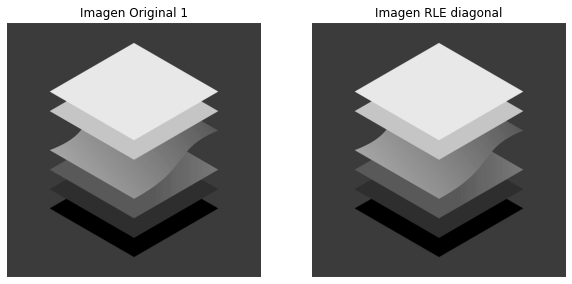

In [71]:
imagen = image2

im1_comprimida_RLEd = RLECompresion(imagen, 'diagonal')
im1_descomprimida_RLEd = RLEDescompresion(im1_comprimida_RLEd)

print("La codificacion nos queda:",im1_comprimida_RLEd)
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,10))

ax1.imshow(imagen,cmap='gray')
ax1.set_title('Imagen Original 1')
ax1.axis('off')

ax2.imshow(im1_descomprimida_RLEd,cmap='gray')
ax2.set_title('Imagen RLE diagonal')
ax2.axis('off')

## Con JPEG

(-0.5, 511.5, 511.5, -0.5)

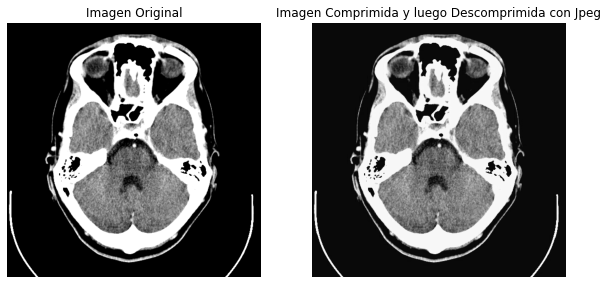

In [69]:
# Con JPEG

imagen = image1

comprimida, diccionario, medias, shape,imagen_rle = JpegCompresion(imagen)

descomprimida_jpeg = JpegDescompresion(comprimida, diccionario, medias, shape)

true_comprimida = [comprimida,diccionario,medias,shape]

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,10))

ax1.imshow(imagen,cmap='gray')
ax1.set_title('Imagen Original')
ax1.axis('off')

ax2.imshow(descomprimida_jpeg,cmap='gray')
ax2.set_title('Imagen Comprimida y luego Descomprimida con Jpeg')
ax2.axis('off')


# Pesos de las imagenes

Calculamos los pesos de las imagenes comprimidas por todos los metodos

### Imagenes Orifinales

In [ ]:
# Veo los pesos ==> Tamaño del objeto en bits

# Imagen 1
print("Peso de la imagen 1:",getsizeof(image1))
print("Con las medidas",image1.shape)
print("\n")

# Imagen 2
print("Peso de la imagen 2:",getsizeof(image2))
print("Con las medidas",image2.shape)
print("\n")

# Imagen 3
print("Peso de la imagen 3:",getsizeof(image3))
print("Con las medidas",image3.shape)



Peso de la imagen 1: 262256
Con las medidas (512, 512)


Peso de la imagen 2: 1440112
Con las medidas (1200, 1200)


Peso de la imagen 3: 861296
Con las medidas (928, 928)


## Con Huffman

In [ ]:
# Imagenes comprimidas

im_comprimida_Huffman_1 = HuffmanCompresion(image1)
print("Peso de la imagen 1 comprimida por huffman:",getsizeof(im_comprimida_Huffman_1))

im_comprimida_Huffman_2 = HuffmanCompresion(image2)
print("Peso de la imagen 2 comprimida por huffman:",getsizeof(im_comprimida_Huffman_2))

im_comprimida_Huffman_3 = HuffmanCompresion(image3)
print("Peso de la imagen 3 comprimida por huffman:",getsizeof(im_comprimida_Huffman_3))

Peso de la imagen 1 comprimida por huffman: 80
Peso de la imagen 2 comprimida por huffman: 80
Peso de la imagen 3 comprimida por huffman: 80


## Con RLE

In [78]:
# Imagenes comprimidas

  # Horizontal
codificada_h_1 = ComprimirLRE_HV(image1, 0)
print("Peso de la imagen 1 comprimida por RLE Horizontal:",getsizeof(codificada_h_1))
codificada_h_2 = ComprimirLRE_HV(image2, 0)
print("Peso de la imagen 2 comprimida por RLE Horizontal:",getsizeof(codificada_h_2))
codificada_h_3 = ComprimirLRE_HV(image3, 0)
print("Peso de la imagen 3 comprimida por RLE Horizontal:",getsizeof(codificada_h_3))

print("\n")

  # Vertical
codificada_v_1 = ComprimirLRE_HV(image1, 1)
print("Peso de la imagen 1 comprimida por RLE Vertical:",getsizeof(codificada_v_1))
codificada_v_2 = ComprimirLRE_HV(image2, 1)
print("Peso de la imagen 2 comprimida por RLE Vertical:",getsizeof(codificada_v_2))
codificada_v_3 = ComprimirLRE_HV(image3, 1)
print("Peso de la imagen 3 comprimida por RLE Vertical:",getsizeof(codificada_v_3))

print("\n")

  # Diagonal
codificada_d_1  = RLECompresion(image1, 'diagonal')
print("Peso de la imagen 1 comprimida por RLE Diagonal:",getsizeof(codificada_d_1))
codificada_d_2  = RLECompresion(image2, 'diagonal')
print("Peso de la imagen 2 comprimida por RLE Diagonal:",getsizeof(codificada_d_2))
codificada_d_3  = RLECompresion(image3, 'diagonal')
print("Peso de la imagen 3 comprimida por RLE Diagonal:",getsizeof(codificada_d_3))

print("\n")

  # Otra Diagonal
codificada_d2_1  = RLE_encoder(image1)
print("Peso de la imagen 1 comprimida por RLE Diagonal 2:",getsizeof(codificada_d2_1))
codificada_d2_2  = RLE_encoder(image2)
print("Peso de la imagen 2 comprimida por RLE Diagonal 2:",getsizeof(codificada_d2_2))
codificada_d2_3  = RLE_encoder(image3)
print("Peso de la imagen 3 comprimida por RLE Diagonal 2:",getsizeof(codificada_d2_3))

Peso de la imagen 1 comprimida por RLE Horizontal: 88
Peso de la imagen 2 comprimida por RLE Horizontal: 88
Peso de la imagen 3 comprimida por RLE Horizontal: 88


Peso de la imagen 1 comprimida por RLE Vertical: 88
Peso de la imagen 2 comprimida por RLE Vertical: 88
Peso de la imagen 3 comprimida por RLE Vertical: 88


Peso de la imagen 1 comprimida por RLE Diagonal: 1174056
Peso de la imagen 2 comprimida por RLE Diagonal: 1671800
Peso de la imagen 3 comprimida por RLE Diagonal: 5429656


Peso de la imagen 1 comprimida por RLE Diagonal 2: 88
Peso de la imagen 2 comprimida por RLE Diagonal 2: 88
Peso de la imagen 3 comprimida por RLE Diagonal 2: 88


## Con JPEG

In [ ]:
# Imagenes comprimidas

comprimida, diccionario, medias, shape = JpegCompresion(image1)
comprimida_1 = [comprimida,diccionario,medias,shape]
print("Peso de la imagen 1 comprimida por JPEG:",getsizeof(comprimida_1))

comprimida, diccionario, medias, shape = JpegCompresion(image2)
comprimida_2 = [comprimida,diccionario,medias,shape]
print("Peso de la imagen 2 comprimida por JPEG:",getsizeof(comprimida_2))

comprimida, diccionario, medias, shape = JpegCompresion(image3)
comprimida_3 = [comprimida,diccionario,medias,shape]
print("Peso de la imagen 3 comprimida por JPEG:",getsizeof(comprimida_3))

Peso de la imagen 1 comprimida por JPEG: 104
Peso de la imagen 2 comprimida por JPEG: 104
Peso de la imagen 3 comprimida por JPEG: 104
